In [1]:
import pandas as pd
import requests as req

In [10]:
URL = 'https://goodinfo.tw/StockInfo/StockList.asp?MARKET_CAT=%E7%86%B1%E9%96%80%E6%8E%92%E8%A1%8C&INDUSTRY_CAT=%E4%B8%89%E5%A4%A7%E6%B3%95%E4%BA%BA%E7%B4%AF%E8%A8%88%E8%B2%B7%E8%B6%85%E5%BC%B5%E6%95%B8+%E2%80%93+%E7%95%B6%E6%97%A5%40%40%E4%B8%89%E5%A4%A7%E6%B3%95%E4%BA%BA%E7%B4%AF%E8%A8%88%E8%B2%B7%E8%B6%85%40%40%E4%B8%89%E5%A4%A7%E6%B3%95%E4%BA%BA%E8%B2%B7%E8%B6%85%E5%BC%B5%E6%95%B8+%E2%80%93+%E7%95%B6%E6%97%A5&SHEET=%E6%B3%95%E4%BA%BA%E8%B2%B7%E8%B3%A3&SHEET2=%E6%B3%95%E4%BA%BA%E8%B2%B7%E8%B3%A3%E5%BC%B5%E6%95%B8'

headers = {'user-agent':'Mozilla/5.0 (Windows NT 6.2; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.138 Safari/537.36'}

s = req.post(URL,{'MARKET_CAT':'熱門排行'
                  ,'INDUSTRY_CAT':'三大法人累計買超張數 – 當日@@三大法人累計買超@@三大法人買超張數 – 當日'
                  ,'SHEET':'法人買賣統計_外資'
                  ,'SHEET2':'法人買賣張數'
},headers = headers)

s.encoding = 'utf-8'

df = pd.read_html(s.text)

In [57]:
context = pd.DataFrame({'名稱':df[64]['名稱'].values[:,0],
                        '合計買賣超張數':[pd.to_numeric(i.replace(',','')) for i in df[64]['合計買賣超張數'].values[:,0]]}
                       ,index = df[64]['代號'].values[:,0])

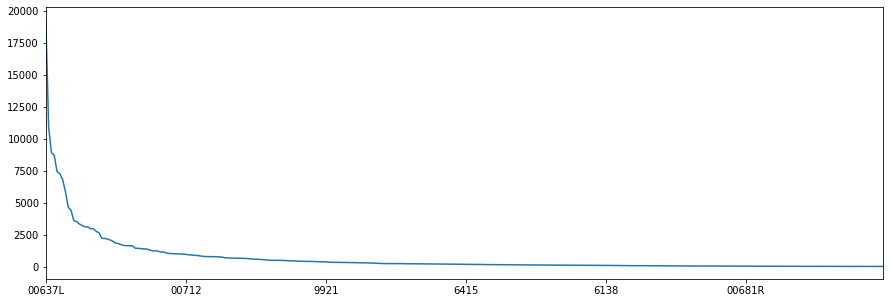

In [59]:
context.iloc[:,1].plot(figsize=(15,5))

In [60]:
context.iloc[:,1].sum()

216482